In [1]:
import model_training

from hamilton import base, driver
from hamilton.io.materialization import to
from hamilton.plugins import plotly_extensions

In [2]:
dag_config = {
    "test_size_fraction": 0.95,
    "shuffle_train_test_split": True,
    "data_loader" : "digits",
    "clf" : "svm",
    "penalty" : "l2"
}
dr = (
    driver.Builder()
    .with_config(dag_config)
    .with_modules(model_training)
    .build()
)

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


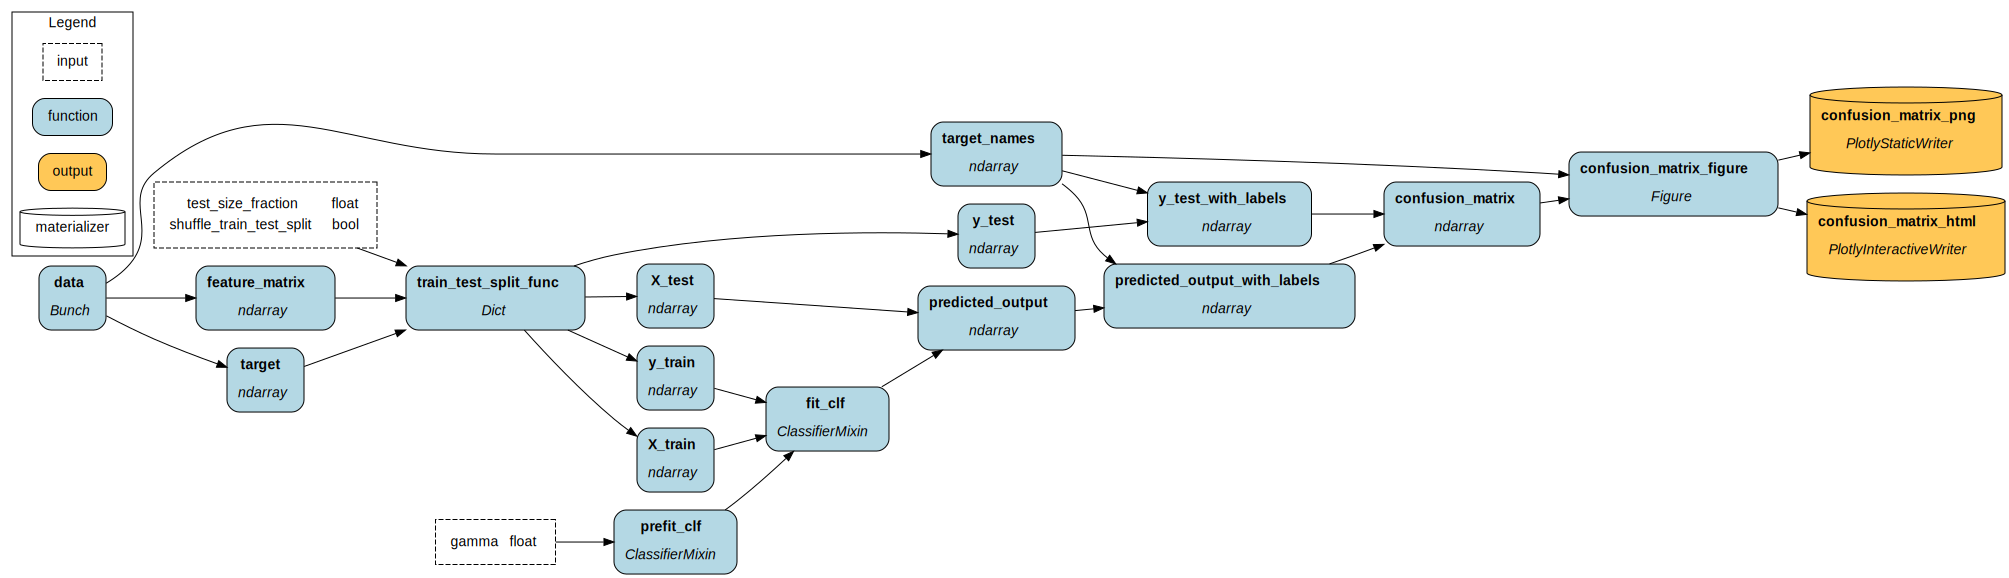

In [3]:
materializers = [
        to.plotly(
            dependencies=["confusion_matrix_figure"],
            id="confusion_matrix_png",
            path="./static.png",
        ),
        to.html(
            dependencies=["confusion_matrix_figure"],
            id="confusion_matrix_html",
            path="./interactive.html",
        ),
    ]

dr.visualize_materialization(*materializers)

In [4]:
dr.materialize(*materializers)

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/tjean/projects/dagworks/hamilton/examples/plotly/ ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


({'confusion_matrix_png': {'size': 27811,
   'path': './static.png',
   'last_modified': 1700427960.600703,
   'timestamp': 1700445960.610717},
  'confusion_matrix_html': {'size': 3605657,
   'path': './interactive.html',
   'last_modified': 1700427960.610703,
   'timestamp': 1700445961.230692}},
 {})